In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
data = pd.read_csv('chaid_model_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   614 non-null    object
 1   Married                  614 non-null    object
 2   Dependents               614 non-null    object
 3   Education                614 non-null    object
 4   Self_Employed            614 non-null    object
 5   ApplicantIncome_Label    614 non-null    object
 6   CoapplicantIncome_Label  614 non-null    object
 7   LoanAmount_Label         614 non-null    object
 8   Term                     614 non-null    object
 9   Credit_History           614 non-null    object
 10  Property_Area            614 non-null    object
 11  Decision                 614 non-null    object
dtypes: object(12)
memory usage: 57.7+ KB


In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_Label,CoapplicantIncome_Label,LoanAmount_Label,Term,Credit_History,Property_Area,Decision
0,Male,No,No,Graduate,No,Low,Low,Average,40Years,Yes,Urban,Y
1,Male,Yes,One,Graduate,No,Low,Low,Average,30Years,Yes,Rural,N
2,Male,Yes,No,Graduate,Yes,Low,Low,Few,30Years,Yes,Urban,Y
3,Male,Yes,No,Not Graduate,No,Low,Low,Average,30Years,Yes,Urban,Y
4,Male,No,No,Graduate,No,Low,Low,Average,30Years,Yes,Urban,Y


EDA

In [34]:
data.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome_Label      0
CoapplicantIncome_Label    0
LoanAmount_Label           0
Term                       0
Credit_History             0
Property_Area              0
Decision                   0
dtype: int64

In [36]:
chaid_data = data

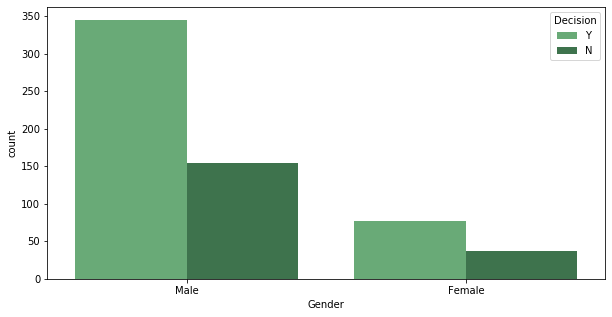

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=data,hue='Decision',palette='Greens_d')
plt.show()

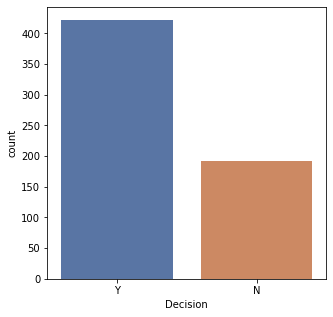

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x='Decision',data=data,palette='deep')
plt.show()

In [61]:
label_encoder = preprocessing.LabelEncoder()
data['Decision']= label_encoder.fit_transform(data['Decision'])
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Education']= label_encoder.fit_transform(data['Education'])
data['Married']= label_encoder.fit_transform(data['Married'])
data['Dependents']= label_encoder.fit_transform(data['Dependents'])
data['Self_Employed']= label_encoder.fit_transform(data['Self_Employed'])
data['ApplicantIncome_Label']= label_encoder.fit_transform(data['ApplicantIncome_Label'])
data['CoapplicantIncome_Label']= label_encoder.fit_transform(data['CoapplicantIncome_Label'])
data['LoanAmount_Label']= label_encoder.fit_transform(data['LoanAmount_Label'])
data['Term']= label_encoder.fit_transform(data['Term'])
data['Credit_History']= label_encoder.fit_transform(data['Credit_History'])
data['Property_Area']= label_encoder.fit_transform(data['Property_Area'])

In [62]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_Label,CoapplicantIncome_Label,LoanAmount_Label,Term,Credit_History,Property_Area,Decision
0,1,0,0,0,0,1,0,0,7,1,2,1
1,1,1,1,0,0,1,0,0,5,1,0,0
2,1,1,0,0,1,1,0,1,5,1,2,1
3,1,1,0,1,0,1,0,0,5,1,2,1
4,1,0,0,0,0,1,0,0,5,1,2,1


In [63]:
y = data['Decision']
X = data.drop(['Decision'], axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [56]:
ytrain

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Decision, Length: 491, dtype: int64

In [64]:
model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
# model = DecisionTreeClassifier()
model = model.fit(xtrain, ytrain)

[Text(627.75, 733.86, 'Credit_History <= 0.5\ngini = 0.438\nsamples = 491\nvalue = [159, 332]\nclass = 0'),
 Text(348.75, 570.78, 'LoanAmount_Label <= 1.5\ngini = 0.232\nsamples = 82\nvalue = [71, 11]\nclass = 1'),
 Text(279.0, 407.70000000000005, 'Dependents <= 1.5\ngini = 0.206\nsamples = 77\nvalue = [68, 9]\nclass = 1'),
 Text(139.5, 244.62, 'Property_Area <= 0.5\ngini = 0.14\nsamples = 53\nvalue = [49, 4]\nclass = 1'),
 Text(69.75, 81.54000000000008, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]\nclass = 1'),
 Text(209.25, 81.54000000000008, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]\nclass = 1'),
 Text(418.5, 244.62, 'Property_Area <= 0.5\ngini = 0.33\nsamples = 24\nvalue = [19, 5]\nclass = 1'),
 Text(348.75, 81.54000000000008, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 1'),
 Text(488.25, 81.54000000000008, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = 1'),
 Text(418.5, 407.70000000000005, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = 1'),
 Text(906.75, 570.78

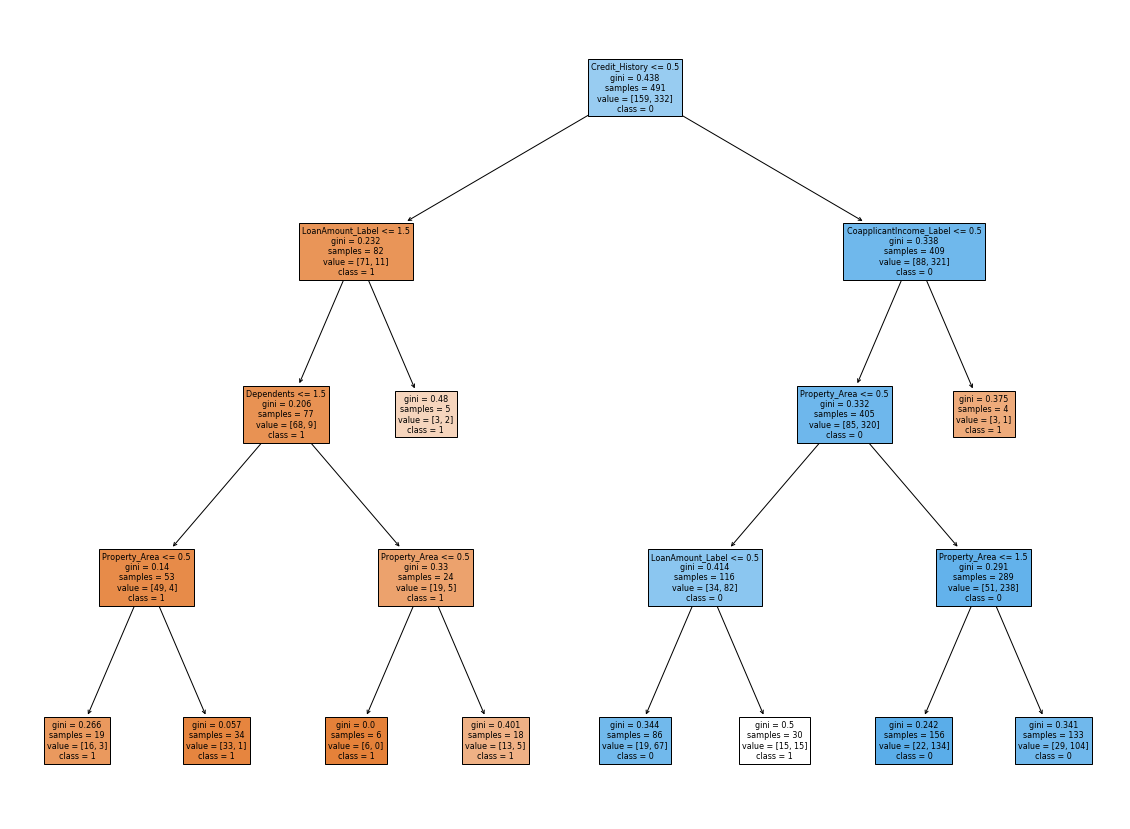

In [65]:
dt_feature_names = list(xtrain.columns)
dt_target_names = [str(s) for s in ytrain.unique()]
plt.figure(figsize = (20,15))
plot_tree(model,feature_names = dt_feature_names, class_names = dt_target_names, filled = True)

In [66]:
y_pred_test = model.predict(xtest)
print(confusion_matrix(ytest, y_pred_test))
print(classification_report(ytest, y_pred_test))

[[19 14]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.76      0.58      0.66        33
           1       0.86      0.93      0.89        90

    accuracy                           0.84       123
   macro avg       0.81      0.75      0.77       123
weighted avg       0.83      0.84      0.83       123



In [67]:
y_pred_train = model.predict(xtrain)
print(confusion_matrix(ytrain, y_pred_train))
print(classification_report(ytrain, y_pred_train))

[[ 89  70]
 [ 27 305]]
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       159
           1       0.81      0.92      0.86       332

    accuracy                           0.80       491
   macro avg       0.79      0.74      0.76       491
weighted avg       0.80      0.80      0.79       491



In [18]:
#pip install chefboost

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   614 non-null    object
 1   Married                  614 non-null    object
 2   Dependents               614 non-null    object
 3   Education                614 non-null    object
 4   Self_Employed            614 non-null    object
 5   ApplicantIncome_Label    614 non-null    object
 6   CoapplicantIncome_Label  614 non-null    object
 7   LoanAmount_Label         614 non-null    object
 8   Term                     614 non-null    object
 9   Credit_History           614 non-null    object
 10  Property_Area            614 non-null    object
 11  Decision                 614 non-null    object
dtypes: object(12)
memory usage: 57.7+ KB


In [76]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome_Label,CoapplicantIncome_Label,LoanAmount_Label,Term,Credit_History,Property_Area,Decision
0,Male,No,No,Graduate,No,Low,Low,Average,40Years,Yes,Urban,Y
1,Male,Yes,One,Graduate,No,Low,Low,Average,30Years,Yes,Rural,N
2,Male,Yes,No,Graduate,Yes,Low,Low,Few,30Years,Yes,Urban,Y
3,Male,Yes,No,Not Graduate,No,Low,Low,Average,30Years,Yes,Urban,Y
4,Male,No,No,Graduate,No,Low,Low,Average,30Years,Yes,Urban,Y


In [77]:
y = data['Decision']
X = data.drop(['Decision'], axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
train_data = pd.concat([xtrain,ytrain], axis = 1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 90 to 559
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Gender                   491 non-null    object
 1   Married                  491 non-null    object
 2   Dependents               491 non-null    object
 3   Education                491 non-null    object
 4   Self_Employed            491 non-null    object
 5   ApplicantIncome_Label    491 non-null    object
 6   CoapplicantIncome_Label  491 non-null    object
 7   LoanAmount_Label         491 non-null    object
 8   Term                     491 non-null    object
 9   Credit_History           491 non-null    object
 10  Property_Area            491 non-null    object
 11  Decision                 491 non-null    object
dtypes: object(12)
memory usage: 49.9+ KB


In [84]:
from chefboost import Chefboost as cb

config = {"algorithm": "C4.5", "max_depth": 3, "Parallelism": True}
dtree2 = cb.fit(train_data, config, target_label = 'Decision')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  18.58590269088745  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  89.81670061099797 % on  491  instances
Labels:  ['Y' 'N']
Confusion matrix:  [[325, 43], [7, 116]]
Precision:  88.3152 %, Recall:  97.8916 %, F1:  92.8571 %


In [95]:
prediction = cb.predict(dtree2, param = xtest.iloc[0])
prediction

'N'